<a href="https://colab.research.google.com/github/davidagapitoq/data_science_for_business_2023/blob/main/Supervised_models/KNN/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PIMA INDIANS DIABETES DATABASE**

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir diagnósticamente si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. Se impusieron varias restricciones a la selección de estos casos de una base de datos más amplia. En concreto, todos los pacientes son mujeres de al menos 21 años y de ascendencia india pima.

### Variables

- **Pregnancies**: Número de embarazos (tasa de fecundidad 2 hijos por mujer)[1]
- **Glucose**: Concentración de glucosa en plasma después de 2 horas de una prueba de tolerancia a la glucosa oral (mg/dL)[2]:
  - Normal: Menos de 140 mg/dL
  - Prediabetes: De 140 mg/dL a 199 mg/dL
  - Diabetes: Mayor a 200 mg/dl
- **BloodPressure**: Presión arterial diastólica (mmHg)[3]:
  - Normal: Menos de 80 mmHg
  - Hipertensión Etapa 1: De 80 mmHg a 90 mmHg
  - Hipertensión Etapa 2: Mayor a 90 mmHg
  - Crisis hipertensiva: Mayor a 120 mmHg
- **SkinThickness**: Grosor del pliegue cutáneo del tríceps (mm)
- **Insulin**: Insulina sérica a las 2 horas (mU/ml)[4]:
  - Diabetes Tipo I: De 5 mU/ml a 20 mU/ml
  - Normal: De 20 mU/ml a 30 mU/ml
  - Resistencia a insulina: 30 mU/ml a 150 mU/ml
  - Diabetes Tipo II: Mayor a 150 mU/ml
- **BMI**: Índice de masa corporal (peso en kg/(altura en m)^2)[5]:
  - Peso insuficiente: Menor de 18.5
  - Normal: De 18.5 a 24.9
  - Sobrepeso: De 25 a 29.9
  - Obesidad: Mayor a 30
- **DiabetesPedigreeFunction**: Indica la probabilidad de tener Diabetes según antecedentes familiares [6]
- **Age**: Edad (años)
- **Outcome**: Target que indica si un paciente tiene diabetes o no:
  - 1: Paciente con diabetes
  - 0: Paciente sin diabetes

***Recuperado de Kaggle:*** https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?search=insulin

**Referencias**:
1. https://datos.bancomundial.org/indicator/SP.DYN.TFRT.IN?locations=IN
2. https://www.mayoclinic.org/es/tests-procedures/glucose-tolerance-test/about/pac-20394296
3. https://www.heart.org/en/news/2023/05/02/presion-arterial-que-significan-los-numeros-y-por-que-importan#:~:text=Seg%C3%BAn%20la%20American%20Heart%20Association,diast%C3%B3lica%20inferior%20a%2080%20mmHg.
4. https://diabetesbien.com/cuanta-es-mucha-o-poca-insulina-en-la-diabetes/
5. https://www.cdc.gov/healthyweight/spanish/assessing/index.html#:~:text=Si%20su%20IMC%20es%20menos,dentro%20del%20rango%20de%20sobrepeso.
6. https://rpubs.com/MMARRES/618010#:~:text=Funci%C3%B3n%20pedigr%C3%AD%20de%20la%20diabetes,negativo%20al%20diagn%C3%B3stico%20de%20diabetes.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

### 1. Leyendo los datos

In [4]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
len(data)

768

In [12]:
data['Outcome'].value_counts(normalize=True) * 100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

<div class="comment" style="background-color: darkgreen; padding: 10px; border: 1px solid blue;">
<div style="color: white;">
Texto en letras blancas
</div>
</div>

### 2. Análisis exploratorio

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 429 to 510
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               537 non-null    int64  
 1   Glucose                   537 non-null    int64  
 2   BloodPressure             537 non-null    int64  
 3   SkinThickness             537 non-null    int64  
 4   Insulin                   537 non-null    int64  
 5   BMI                       537 non-null    float64
 6   DiabetesPedigreeFunction  537 non-null    float64
 7   Age                       537 non-null    int64  
 8   Outcome                   537 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.0 KB


In [22]:
data['Outcome'] = data['Outcome'].astype('category')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [26]:
data = data.drop_duplicates()

In [27]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

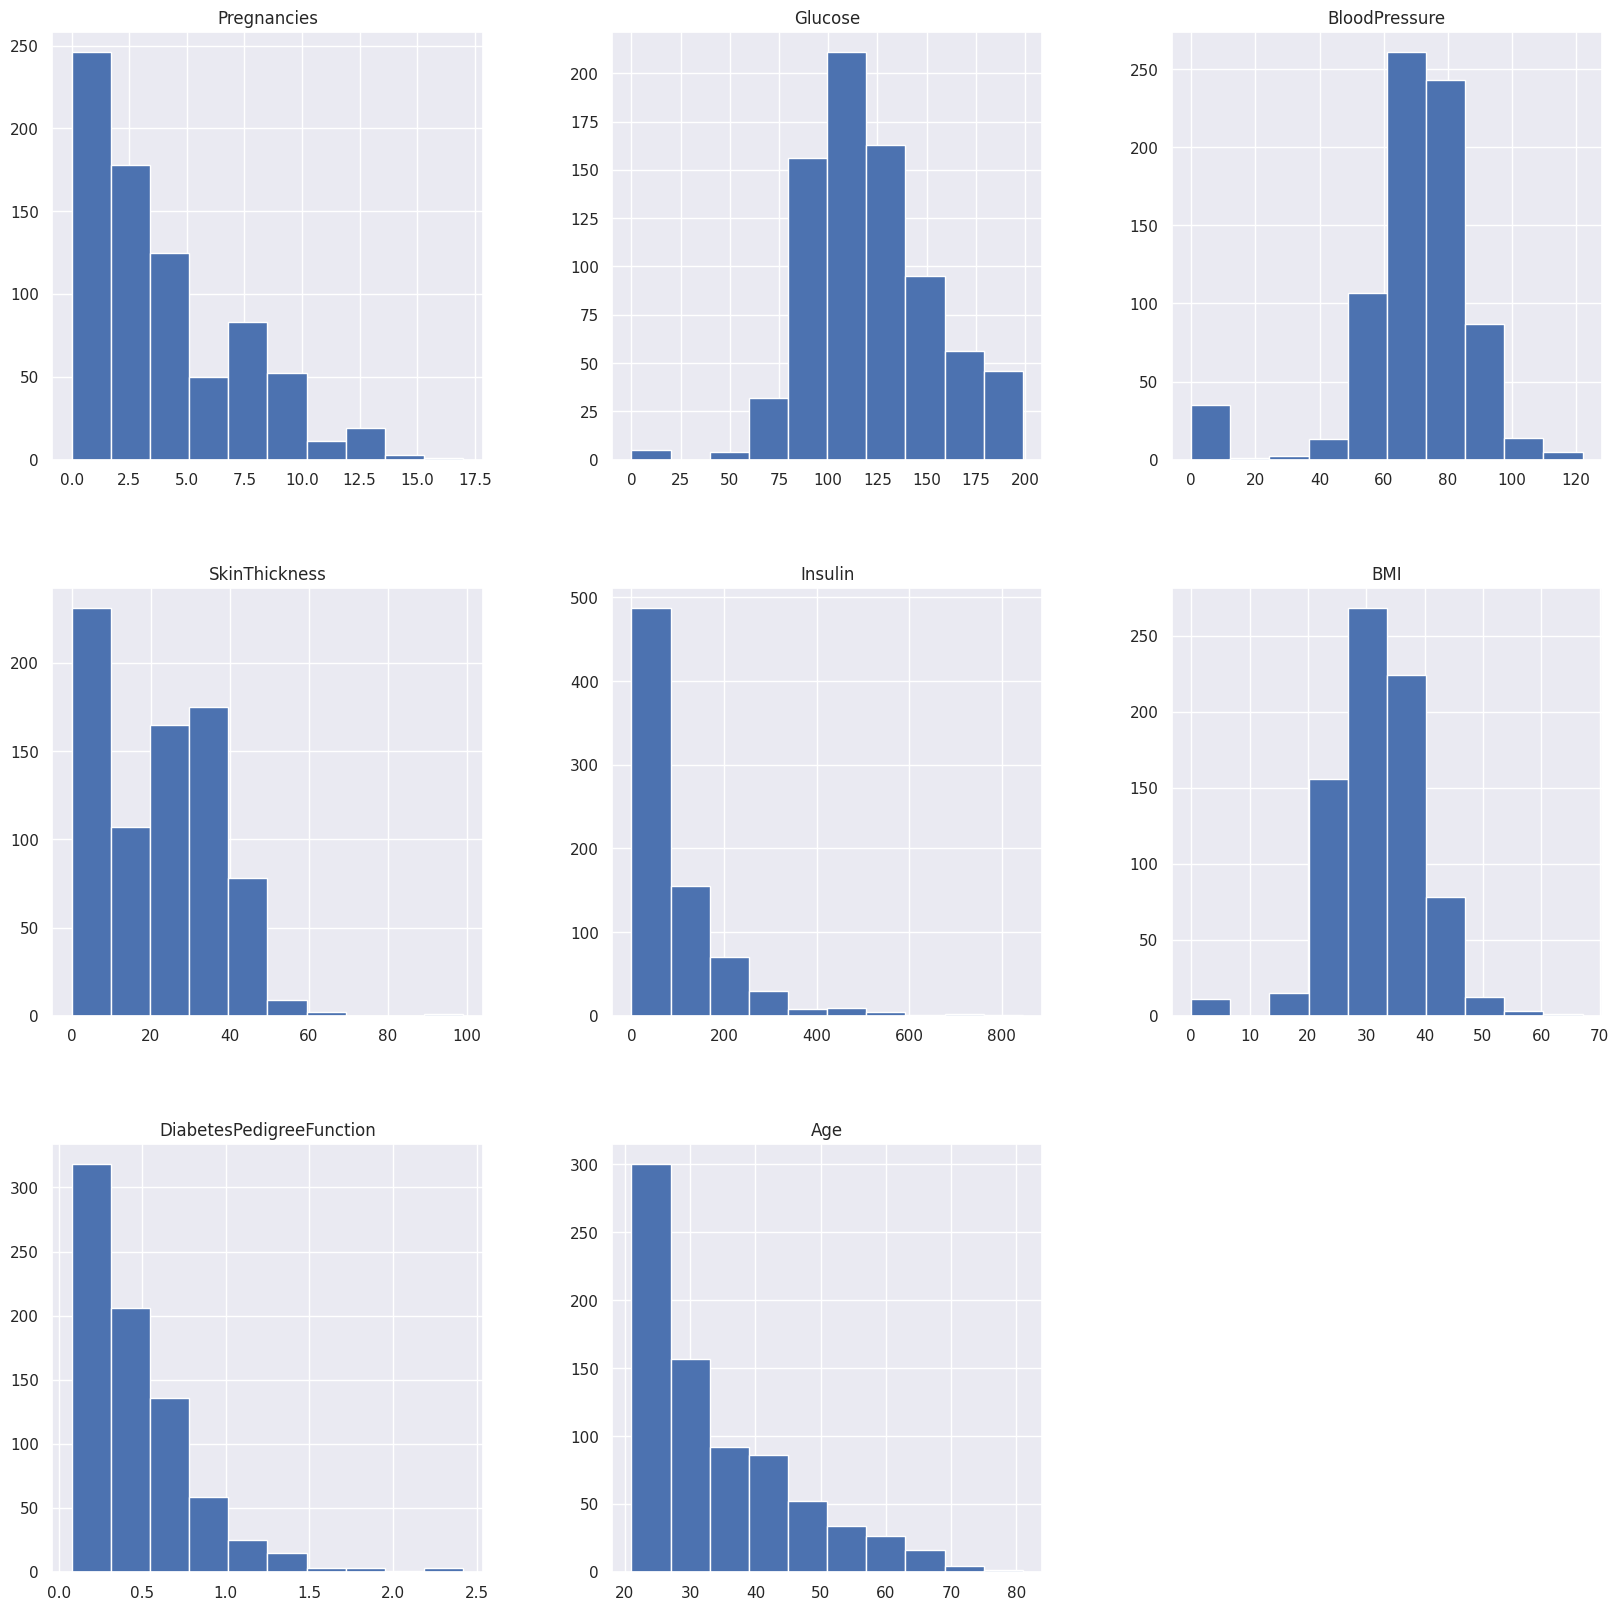

In [28]:
data.hist(figsize = (20,20))

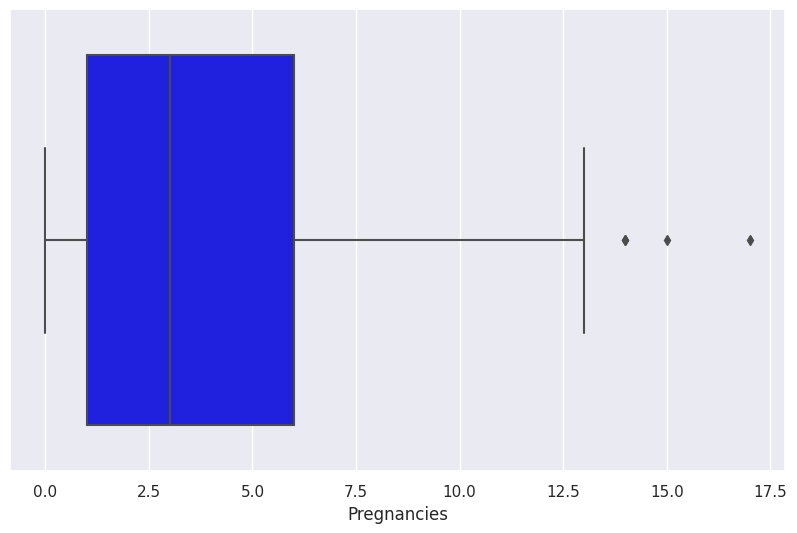

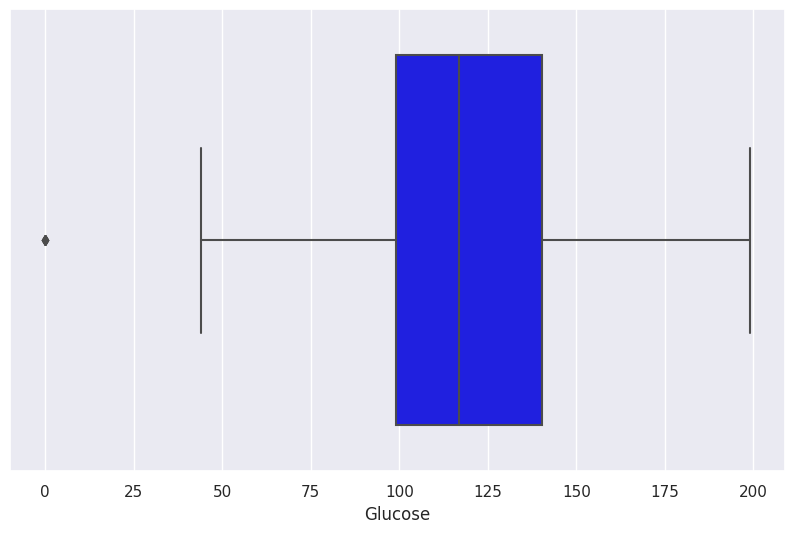

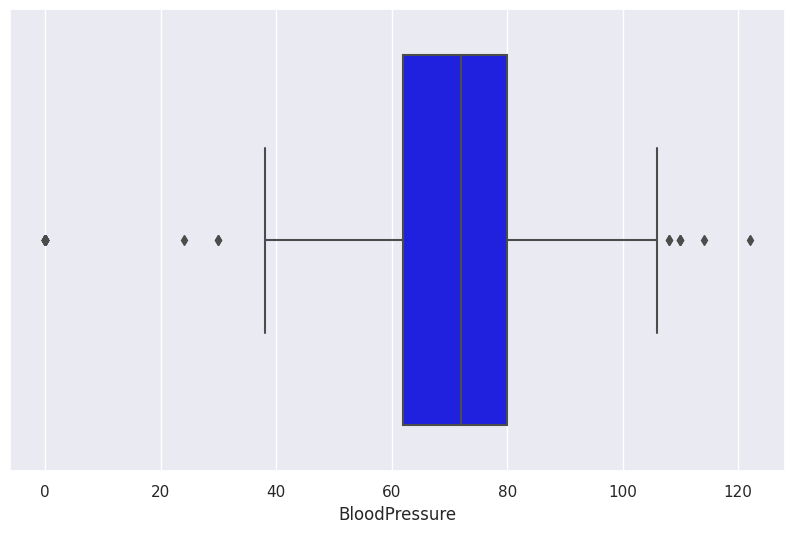

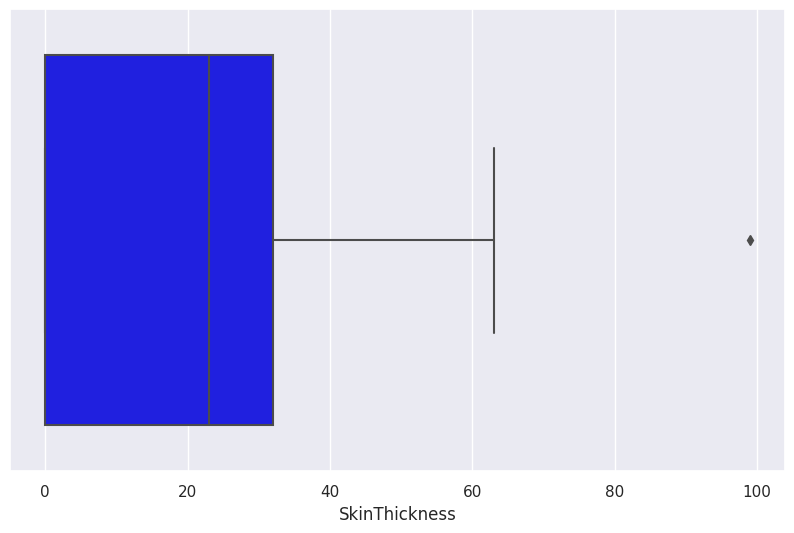

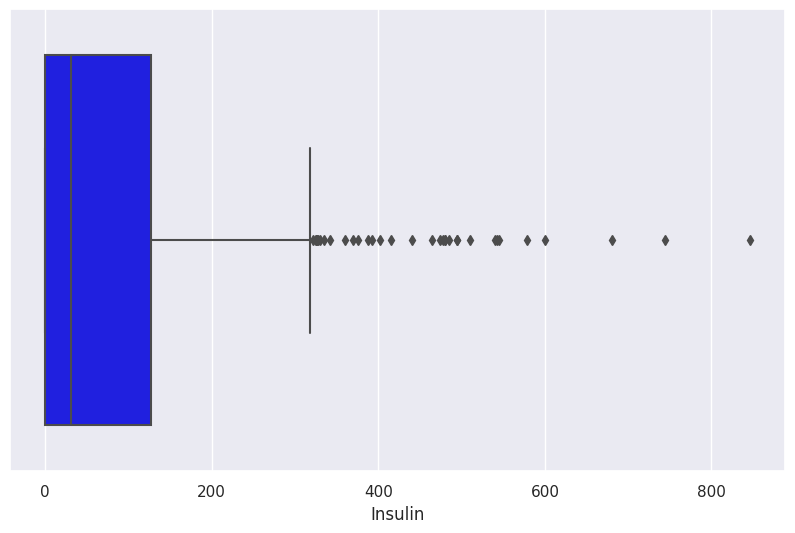

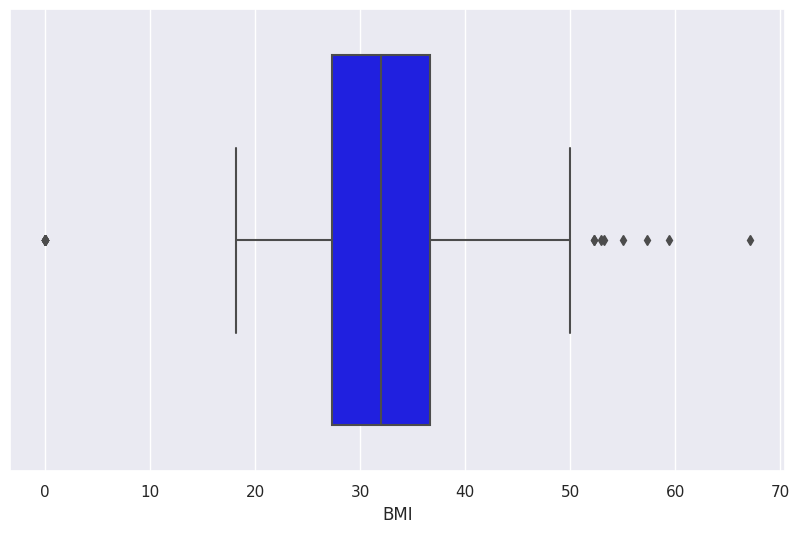

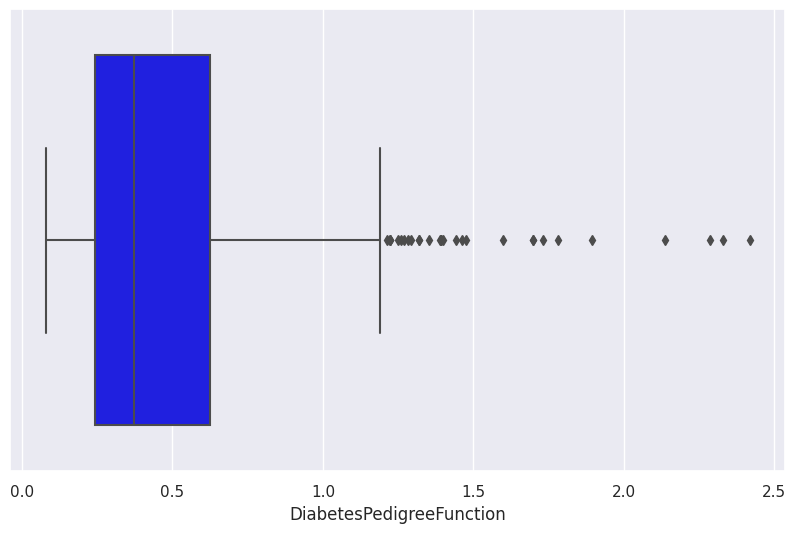

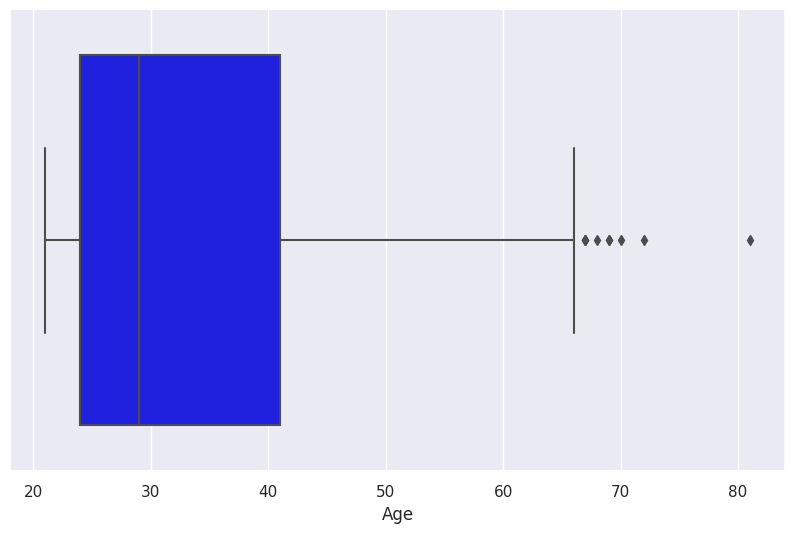

In [31]:
for i in data.columns:
    if data[i].dtype != 'category':  # Verificar si la columna es numérica
        sns.boxplot(x=i, data=data, color='blue')
        plt.xlabel(i)
        plt.show()

### 3. Muestreo

In [17]:
# Muestreo sin stratify
train, test = train_test_split(data,
                               train_size = 0.7,
                               random_state = 123)

In [ ]:
# Muestreo con stratify
# train, test = train_test_split(data,
#                                stratify = ['Outcome'],
#                                train_size = 0.7,
#                                random_state = 123)

### 4. Tratamiento de outliers

In [ ]:
# Calcular la media y la desviación estándar de las variables
mean = train_encoded.mean()
std  = train_encoded.std()

In [ ]:
# Definir el criterio para detectar outliers (por ejemplo, considerando valores a más de 3 desviaciones estándar)
threshold = 3
outlier_criteria = (np.abs(train_encoded - mean) > threshold * std)


In [ ]:
# Capear los outliers a un valor máximo o mínimo

train_treat = train_encoded.clip(lower = train_encoded - threshold * std, upper = train_encoded + threshold * std)
test_treat  =  test_encoded.clip(lower = test_encoded - threshold * std, upper = test_encoded + threshold * std)


### 5. Estandarización de datos

In [ ]:
X_train = train_treat[['Age',	'Gender',	'Education Level',	'Job Title',	'Years of Experience']]
X_test  =  test_treat[['Age',	'Gender',	'Education Level',	'Job Title',	'Years of Experience']]

y_train = train_treat.Salary
y_test  =  test_treat.Salary


In [ ]:
# Estandarizar las variables en el DataFrame

X_train_scaled = (X_train - X_train.mean())/X_train.std()
X_test_scaled  = ( X_test - X_train.mean())/X_train.std()


### 6. Tratamiento de missings

In [ ]:
# Calcular la cantidad de valores faltantes por columna
missing_values = X_train_scaled.isnull().sum()
print(missing_values)

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
dtype: int64


In [ ]:
X_train_f = X_train_scaled.fillna(X_train_scaled.median())
X_test_f  =  X_test_scaled.fillna(X_train_scaled.median())


### 7. KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *

# Crear un objeto KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 30)
knn.fit(X_train_f, y_train)


KNeighborsRegressor(n_neighbors=30)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_train_pred = knn.predict(X_train_f)
y_test_pred = knn.predict(X_test_f)


### 8. Performance

Text(0, 0.5, 'Eje Y')

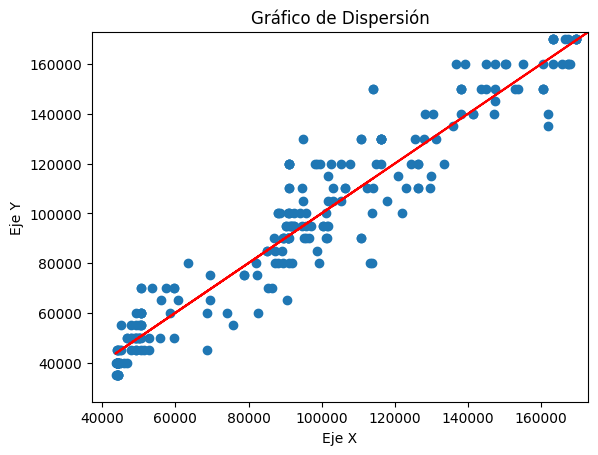

In [ ]:
# Crear el gráfico de dispersión
plt.scatter(y_test_pred, y_test)
plt.plot(y_test_pred, y_test_pred, color='red')

# Establecer el límite del eje Y como el máximo valor en el eje X
plt.xlim(plt.xlim()[0], np.max(y_test_pred))
plt.ylim(plt.ylim()[0], np.max(y_test_pred))

# Personalizar el gráfico
plt.title('Gráfico de Dispersión')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

In [ ]:
# Calcular las métricas de regresión
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)



In [ ]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)

MAE: 9392.081736909324
MSE: 170194338.0161771
RMSE: 13045.855204476902
R^2: 0.9183679193438627
